決策樹迴歸方法與分類有點類似差別僅在於評估分枝好壞的方式不同。當數據集的輸出爲連續性數值時，該樹算法就是一個迴歸樹。透過樹的展開，並用葉節點的均值作爲預測值。

In [23]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import numpy as np
import matplotlib.pyplot as plt

In [28]:
boston = load_boston()
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, boston.data, boston.target, cv=10,
                scoring = "neg_mean_squared_error")
#scoring by minus MSE

array([-18.08941176, -10.61843137, -16.31843137, -44.97803922,
       -17.12509804, -49.71509804, -12.9986    , -88.4514    ,
       -55.7914    , -25.0816    ])

In [6]:
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80,1), axis=0)
X.shape

(80, 1)

In [8]:
y = np.sin(X).ravel()
# ravel to do the dimension reduction
y.shape

(80,)

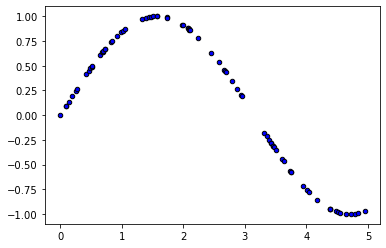

In [13]:
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",c="b", label="data")
plt.show()

In [15]:
# adding noise
y[::5] += 3 * (0.5 - rng.rand(16))

In [16]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeRegressor(max_depth=5)

In [17]:
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis] # dimension increasing
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

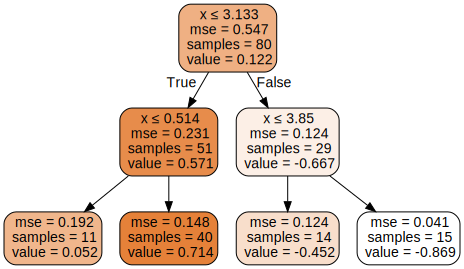

In [25]:
import graphviz

dot_data = export_graphviz(regr_1, out_file=None, 
                         feature_names=['x'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data) 
graph

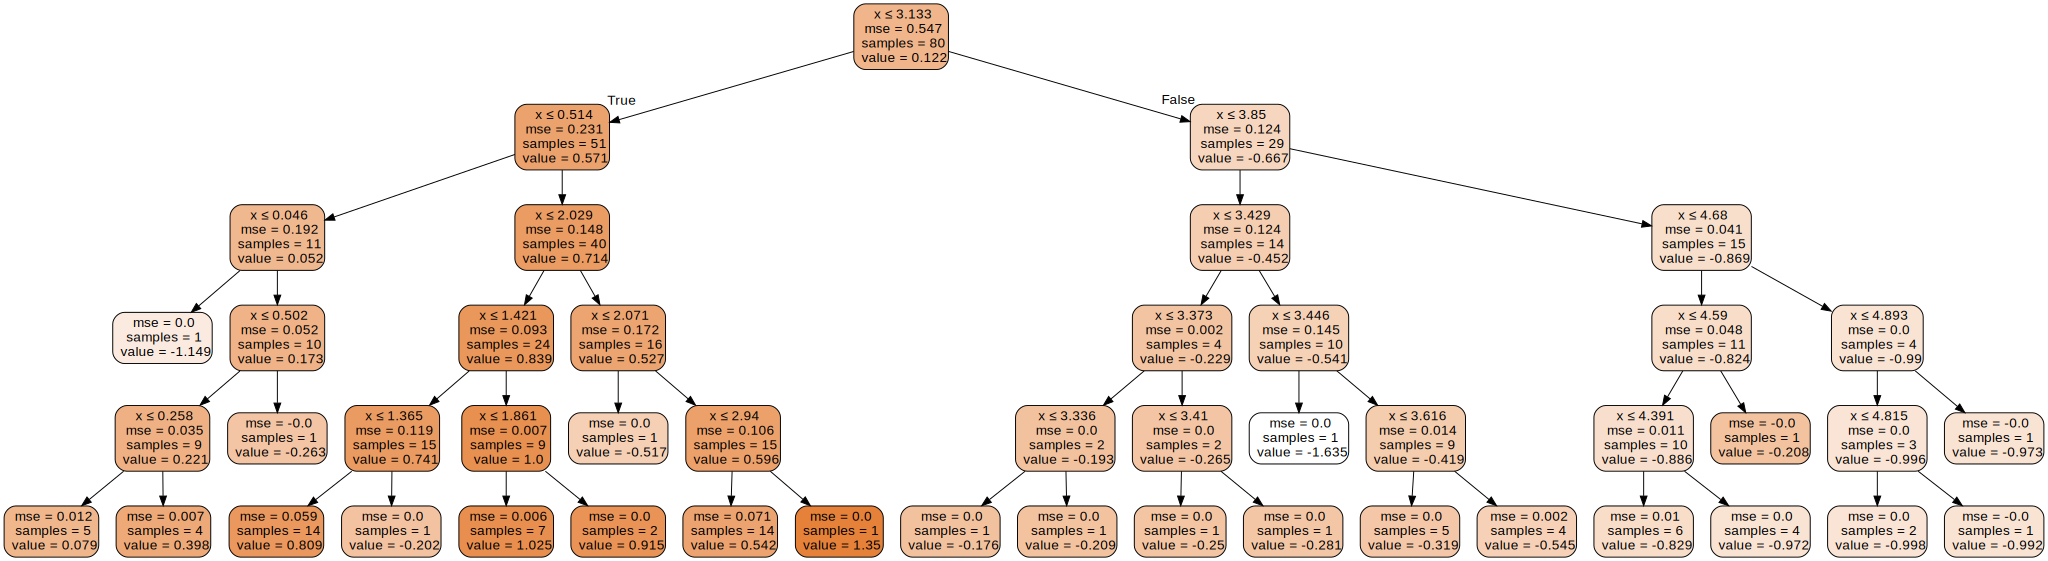

In [26]:
import graphviz

dot_data = export_graphviz(regr_2, out_file=None, 
                         feature_names=['x'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data) 
graph

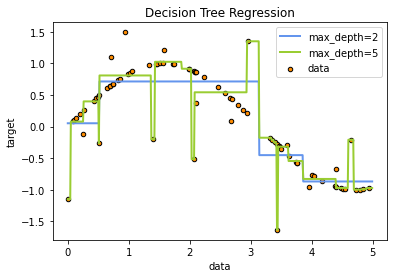

In [18]:
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [34]:
regr_1.score(X_test,y_1)

1.0

In [35]:
regr_2.score(X_test,y_2)

1.0